# Workbook

Use this notebook to complete the exercises throughout the workshop.

#### Table of Contents
- [Section 1 &ndash; Getting Started with Matplotlib](#Section-1)


---

### Section 1

#### Exercise 1.1
##### Using the data in `weather.csv`, plot the daily average temperature (`TAVG`) for both LA and NYC. Fill in all sections where NYC's daily average temperature was higher than LA's in 2020.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
weather = pd.read_csv("weather.csv")
weather.head()

,date,city,AWND,PRCP,SNOW,TAVG,TMAX,TMIN
0,2020-01-01,Atlanta,7.2,0.0,0.0,45.0,57.0,36.0
1,2020-01-01,Boston,15.4,0.0,0.0,39.0,43.0,36.0
2,2020-01-01,Chicago,11.9,0.0,0.0,28.0,42.0,21.0
3,2020-01-01,Honolulu,6.3,0.0,NaN,76.0,81.0,68.0
4,2020-01-01,Houston,6.5,0.1,0.0,52.0,60.0,47.0


In [ ]:
cols = ['date', 'TAVG']
nyc = weather.loc[weather['city']=='NYC'][cols]
la = weather.loc[weather['city']=='LA'][cols]
la = la.set_index("date")
la.head()

,TAVG
date,
2020-01-01,61.0
2020-01-02,58.0
2020-01-03,60.0
2020-01-04,59.0
2020-01-05,58.0


In [ ]:
weather_df = weather.loc[weather['city'].isin(['LA', 'NYC'])]
weather_df = weather_df[['date', 'city', 'TAVG']]
weather_df = weather_df.pivot(index='date', columns='city', values='TAVG')
weather_df = weather_df.reset_index()
weather_df['date'] = pd.to_datetime(weather_df['date'])

weather_df.head()

city,date,LA,NYC
0,2020-01-01,61.0,40.0
1,2020-01-02,58.0,40.0
2,2020-01-03,60.0,47.0
3,2020-01-04,59.0,47.0
4,2020-01-05,58.0,40.0


In [ ]:
from datetime import datetime

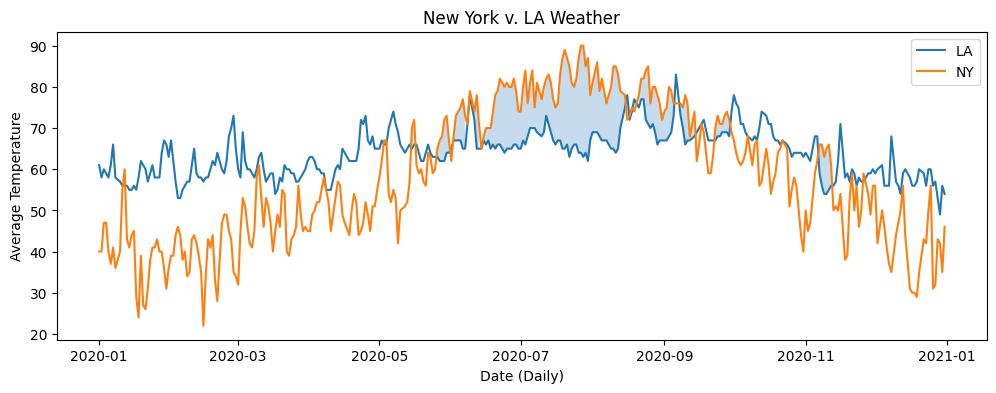

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(weather_df['date'], weather_df['LA'], label='LA')
ax.plot(weather_df['date'], weather_df['NYC'], label='NY')
ax.set(title="New York v. LA Weather", xlabel="Date (Daily)", ylabel="Average Temperature")
ax.fill_between(
    weather_df['date'], weather_df.LA,weather_df.NYC, alpha=0.25, where=weather_df.NYC>weather_df.LA
)
ax.legend()
plt.show()

#### Exercise 1.2
##### Using the data in `weather.csv`, make a vertical bar plot showing total monthly precipitation (`PRCP`) in Seattle. Annotate the bars.

<ipython-input-35-2ab00f302be6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sea['date'] = pd.to_datetime(sea['date']) #-- Convert date to datetime data type
<ipython-input-35-2ab00f302be6>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sea = sea.resample('m').sum() #-- group by month, sum


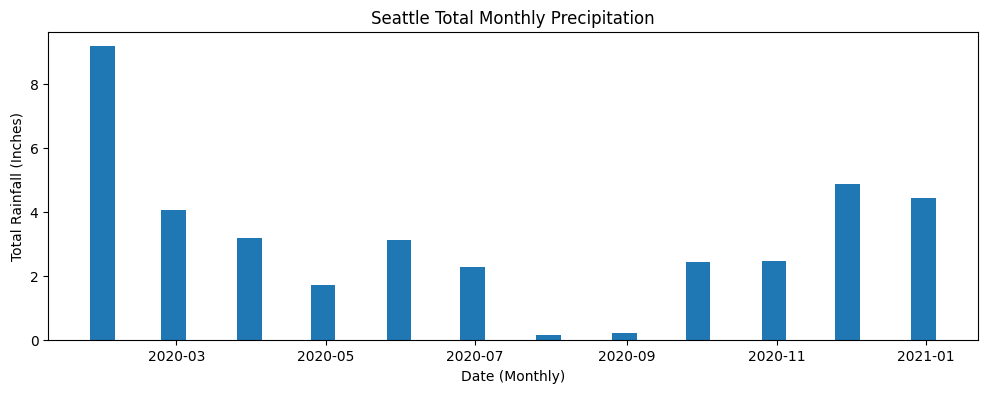

In [ ]:
#-- Structure Data
sea = weather.loc[weather['city']=='Seattle'] #-- Filter to Seattle
sea['date'] = pd.to_datetime(sea['date']) #-- Convert date to datetime data type
sea = sea.set_index('date') #-- Set date to index in preperation for aggregating to monthly data
sea = sea.resample('m').sum() #-- group by month, sum
#sea = sea.reset_index() #-- bring date back as a column

#-- Create bar graph
fig, ax = plt.subplots(figsize=(12,4))
ax.bar(sea.index, sea['PRCP'], width=10)
ax.set(title="Seattle Total Monthly Precipitation", xlabel="Date (Monthly)", ylabel="Total Rainfall (Inches)")
plt.show()

#### Exercise 1.3
##### Using the data in `weather.csv`, create a stacked horizontal bar plot of total precipitation per city per quarter (each city will have four segments &ndash; one for the total precipitation in each quarter of the year). Add a vertical line at Seattle's total precipitation.

<ipython-input-25-f8128660fa64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain['date'] = pd.to_datetime(rain['date']) #-- Convert date to datetime data type
<ipython-input-25-f8128660fa64>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain['date_quarter'] = "Q"+ rain['date'].dt.quarter.astype(str) #-- Create clean date label


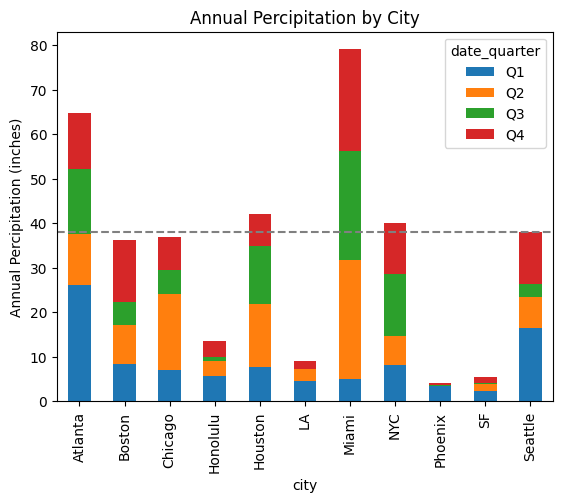

In [ ]:
#-- Structure Data
rain = weather[['date', 'city','PRCP']]
rain['date'] = pd.to_datetime(rain['date']) #-- Convert date to datetime data type
rain['date_quarter'] = "Q"+ rain['date'].dt.quarter.astype(str) #-- Create clean date label
rain = rain.pivot_table(index='city', columns='date_quarter', values='PRCP', aggfunc='sum')
rain.plot.bar(stacked=True)
plt.axhline(rain.loc['Seattle'].sum(), 0, 4, color='grey', linestyle='--')
plt.ylabel("Annual Percipitation (inches)")
plt.title("Annual Percipitation by City")
plt.show()

#### Exercise 1.4
##### Using the data in `weather.csv`, generate histograms for the daily average wind (`AWND`) in each of the cities. Make sure to use subplots that share both the x- and y-axis.

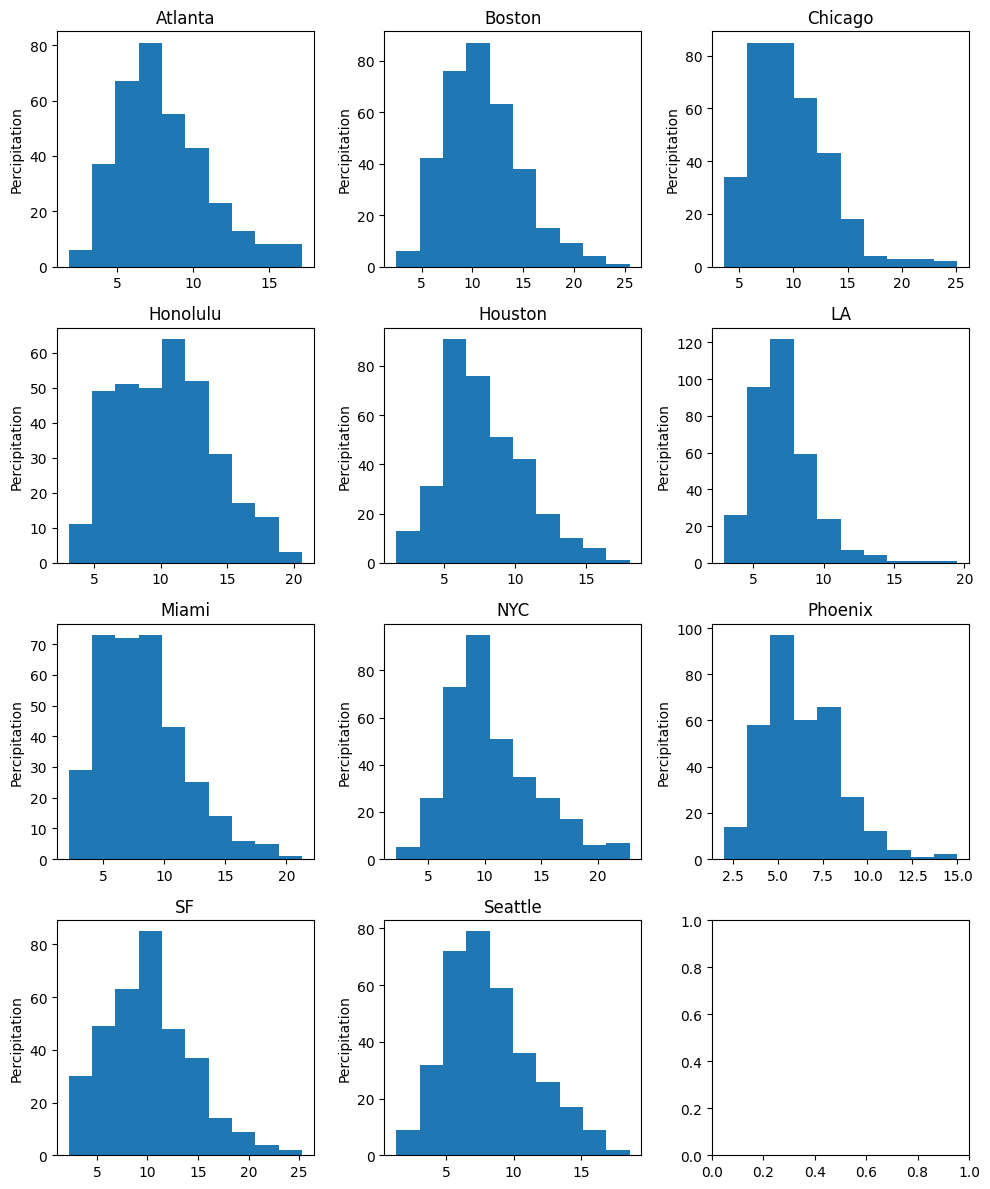

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(10, 12)) #-- enough rows, columns for unique cities
for city, ax in zip(weather.city.unique(), axs.flatten()): #-- match an axis for each city
    _ = weather.loc[weather['city']==city, 'AWND'] #-- Create Series for city
    ax.hist(_)
    ax.set_title(city)
    ax.set_ylabel("Percipitation")
fig.tight_layout() #-- Improves spacing
plt.show()

